In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)

pd.__version__, sklearn.__version__

('2.1.1', '1.3.1')

In [2]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

# For local dev
SCRATCH_DIR = "./../data"

In [3]:
consolidated_df = pd.read_parquet(
    f"{SCRATCH_DIR}/consolidated_features_all_delays.parquet"
)

delay_columns = [
    "DepDel15",
    "ArrDel15",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
]

corr_df = consolidated_df[delay_columns].copy()

corr_df

,DepDel15,ArrDel15,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
24733033,0,0,0,0,0,0,0
24733034,0,0,0,0,0,0,0
24733035,0,0,0,0,0,0,0
24733036,0,0,0,0,0,0,0
24733037,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
32288695,0,0,0,0,0,0,0
32288696,1,1,0,0,0,0,23
32288697,0,1,0,0,36,0,0
32288698,0,0,0,0,0,0,0


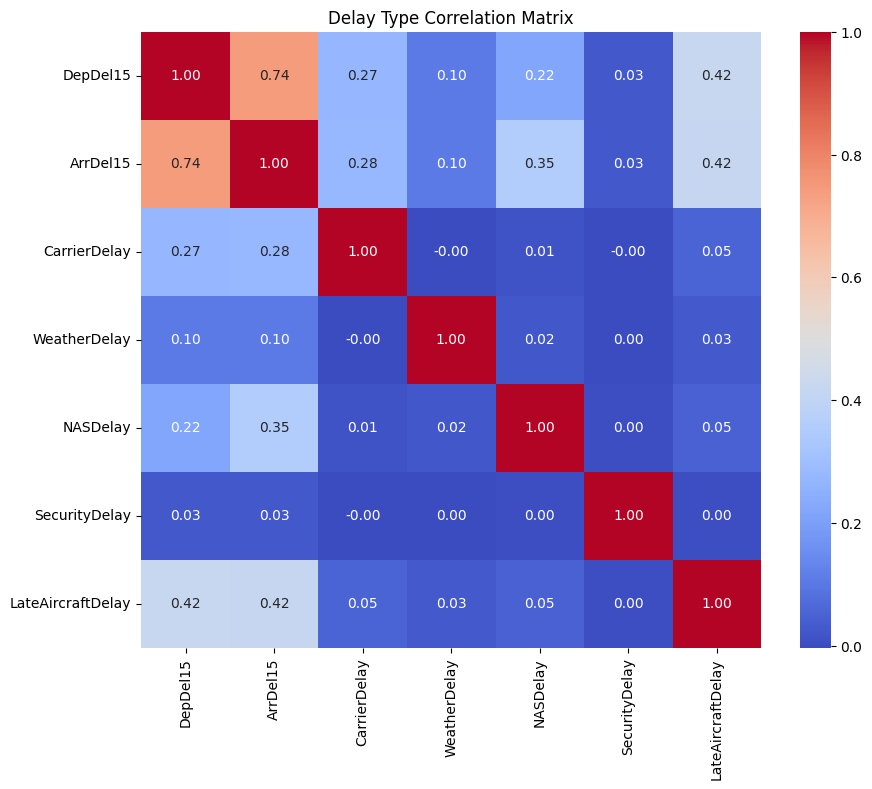

In [4]:
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Delay Type Correlation Matrix")
plt.show()

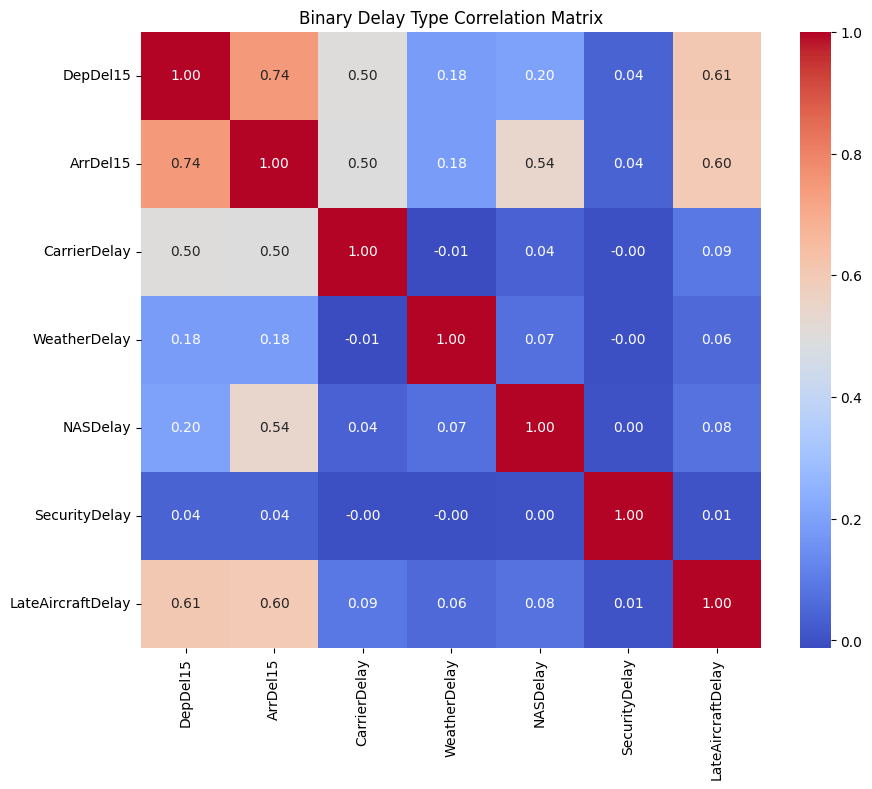

In [5]:
minute_based_delays = [
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
]

corr_df[minute_based_delays] = corr_df[minute_based_delays].applymap(
    lambda x: 1 if x >= 15 else 0
)

correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Binary Delay Type Correlation Matrix")
plt.show()